In [1]:
from UTILITY_quickstart import *

## Calculate nominal optics from 'default' 

In [2]:
#Load a default configuration
importedDefaultSettings = loadConfig("setLattice_configs/defaults.yml")

#Initialize tao object
tao = initializeTao()

#Set lattice to the loaded config
setLattice(tao, **importedDefaultSettings)

tao.twiss_at_s(ele = "PENT", s_offset = 0.0)

Environment set to:  /Users/nmajik/Documents/SLAC/FACET2-Bmad-PyTao
Tracking to end
CSR off
Overwriting lattice with setLattice() defaults
No defaults file provided to setLattice(). Using setLattice_configs/defaults.yml
WARNING! No beam file is specified!
Number of macro particles defined by input file


{'beta_a': 0.50649204966748,
 'alpha_a': 0.0466683356262582,
 'gamma_a': 1.9786646882376,
 'phi_a': 73.0782192378143,
 'eta_a': -5.53984755575948e-06,
 'etap_a': -1.05998552673305e-05,
 'beta_b': 0.500627846338041,
 'alpha_b': -0.120964597934503,
 'gamma_b': 2.02671993053367,
 'phi_b': 60.5521347355512,
 'eta_b': -2.11809896530596e-18,
 'etap_b': -2.52217362743306e-18,
 'c_mat11': 1.24354101578855e-16,
 'c_mat12': -2.15263057112982e-17,
 'c_mat21': -3.33737707176956e-17,
 'c_mat22': 4.78887427948486e-18,
 'gamma_c': 1.0}

In [3]:
allMagnetConfigs = []

betaSetting = 0.5
waistLocations = [-1 * betaSetting, 0, betaSetting]

for offset in waistLocations:
    allMagnetConfigs.append(
        finalFocusSolver(tao, 
                     ele = "PENT",
                     s_offset = offset,
                     targetBetaX = betaSetting,
                     targetAlphaX = 0.0,
                     targetBetaY = betaSetting,
                     targetAlphaY = 0,
                     verbose = True
                     )
    )

allMagnetConfigs = { "upstream" : allMagnetConfigs[0], "PENT" : allMagnetConfigs[1], "downstream" : allMagnetConfigs[2] }
waistSOffset = { "upstream" : waistLocations[0], "PENT" : waistLocations[1], "downstream" : waistLocations[2] }

Optimization Results:
Optimal Parameters: [ -67.76984659  -79.73112448   98.00236824  132.6233353  -244.0041839
  130.61315646]
Objective Function Value at Optimal Parameters: 0.0001559033725029663
Number of Iterations: 583
Converged: True
Optimization Results:
Optimal Parameters: [ -72.10007249  -81.35360454   99.27426586  126.46451734 -234.61673705
  126.33640932]
Objective Function Value at Optimal Parameters: 4.5775805850083643e-07
Number of Iterations: 627
Converged: True
Optimization Results:
Optimal Parameters: [ -75.89019358  -83.02458665   99.54713792  121.8312029  -226.6814921
  121.6982502 ]
Objective Function Value at Optimal Parameters: 0.0001352163349461823
Number of Iterations: 759
Converged: True


## Change to two bunch lattice

In [4]:
importedDefaultSettings = loadConfig("setLattice_configs/2024-10-14_twoBunch.yml")
#importedDefaultSettings = loadConfig("setLattice_configs/2024-10-22_oneBunch.yml")

csrTF = True
evalElement = "PENT"


inputBeamFilePathSuffix = importedDefaultSettings["inputBeamFilePathSuffix"]
bunchCount = importedDefaultSettings["bunchCount"]

tao = initializeTao(
    #inputBeamFilePathSuffix = '/beams/nmmToL0AFEND_2bunch_2024-02-16Clean/2024-02-16_2bunch_1e5Downsample_nudgeWeights.h5',
    inputBeamFilePathSuffix = inputBeamFilePathSuffix,
    
    csrTF = csrTF,
    numMacroParticles=1e4,
)

setLattice(tao, **importedDefaultSettings)

trackBeam(tao, 
          **importedDefaultSettings,
          verbose = True
         )

Environment set to:  /Users/nmajik/Documents/SLAC/FACET2-Bmad-PyTao
Tracking to end
CSR on
Overwriting lattice with setLattice() defaults
No defaults file provided to setLattice(). Using setLattice_configs/defaults.yml
Number of macro particles = 10000.0
Loaded activeBeamFile.h5
Set track_start = L0AFEND, track_end = end
Set track_end = BEGBC14_1
Tracking!
Also setting BC14 energy = 4.5 GeV, from 4.429332714967451 GeV
Beam centered at BEGBC14 written to patchBeamFile.h5
Loaded patchBeamFile.h5
Set track_start = BEGBC14_1, track_end = end
Set track_end = BEGBC20
Tracking!
Also setting BC20 energy = 10.0 GeV, from 9.926733863327842 GeV
Beam centered at BEGBC20 written to patchBeamFile.h5
Loaded patchBeamFile.h5
Set track_start = BEGBC20, track_end = end
Set track_end = MFFF
Tracking!
Beam centered at MFFF written to patchBeamFile.h5
Loaded patchBeamFile.h5
Set track_start = MFFF, track_end = end
Tracking!
trackBeam() exiting


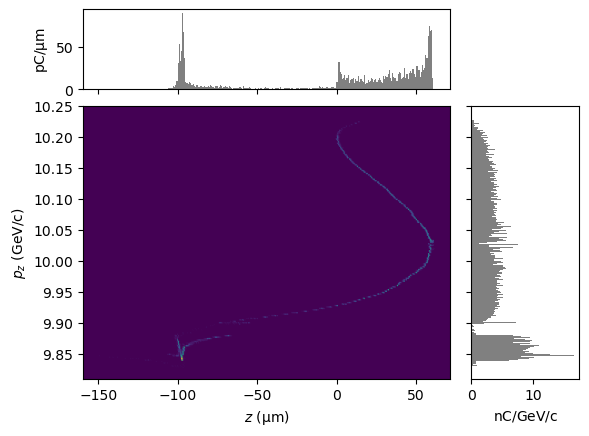

/Users/nmajik/Documents/SLAC/FACET2-Bmad-PyTao/UTILITY_quickstart.py:445: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(sigmax**2 + 2 * z * rho * sigmax * sigmaxp + z**2 * sigmaxp**2)


{'PDrive_median_x': -2.6901871245691506e-06,
 'PDrive_median_y': -7.438301286849276e-07,
 'PDrive_median_xp': -3.721451526879043e-05,
 'PDrive_median_yp': 5.576778994249823e-07,
 'PDrive_sigmaSI90_x': 2.321835509223582e-05,
 'PDrive_sigmaSI90_y': 1.9601138583203697e-05,
 'PDrive_sigmaSI90_z': 1.8123355065686948e-05,
 'PDrive_sigmaSI90_xp': 9.42875677797177e-05,
 'PDrive_sigmaSI90_yp': 2.4361912833130295e-05,
 'PDrive_emitSI90_x': 4.2454755906603666e-05,
 'PDrive_emitSI90_y': 5.605682701892437e-06,
 'PDrive_norm_emit_x': 5.1076151786692444e-05,
 'PDrive_norm_emit_y': 8.232221781373902e-06,
 'PDrive_zCentroid': 991.3313201589672,
 'PDrive_charge_nC': 1.2120908800000003,
 'PWitness_median_x': -1.1221901794428641e-05,
 'PWitness_median_y': 8.701173822081041e-07,
 'PWitness_median_xp': 8.14589269295049e-05,
 'PWitness_median_yp': -5.924104524900713e-06,
 'PWitness_sigmaSI90_x': 1.7807674852703936e-05,
 'PWitness_sigmaSI90_y': 1.6538529944871596e-05,
 'PWitness_sigmaSI90_z': 7.84457960944948

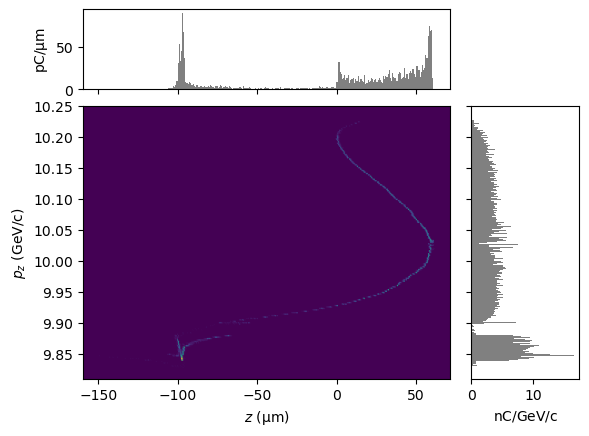

In [5]:
P = getBeamAtElement(tao, "PENT")
display(plotMod(P, 'z', 'pz', bins=300))
getBeamSpecs(P)

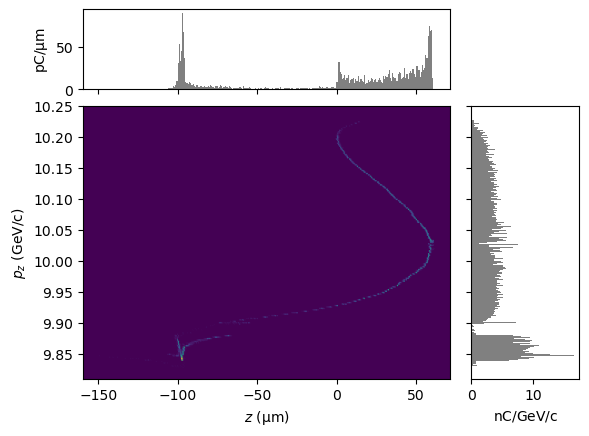

{'PDrive_median_x': -2.6901877235959374e-06,
 'PDrive_median_y': -7.438301188797972e-07,
 'PDrive_median_xp': -3.72145151677354e-05,
 'PDrive_median_yp': 5.576780093515154e-07,
 'PDrive_sigmaSI90_x': 2.3218355016154848e-05,
 'PDrive_sigmaSI90_y': 1.96011392533829e-05,
 'PDrive_sigmaSI90_z': 1.8123355065686948e-05,
 'PDrive_sigmaSI90_xp': 9.428756790706275e-05,
 'PDrive_sigmaSI90_yp': 2.4361913035289202e-05,
 'PDrive_emitSI90_x': 4.245475076061464e-05,
 'PDrive_emitSI90_y': 5.605683745943975e-06,
 'PDrive_norm_emit_x': 5.107615176280509e-05,
 'PDrive_norm_emit_y': 8.232221777194076e-06,
 'PDrive_zCentroid': 991.3313201589672,
 'PDrive_charge_nC': 1.2120908800000003,
 'PWitness_median_x': -1.1221899423797173e-05,
 'PWitness_median_y': 8.701173905714056e-07,
 'PWitness_median_xp': 8.1458926878849e-05,
 'PWitness_median_yp': -5.924104477742353e-06,
 'PWitness_sigmaSI90_x': 1.7807674919863006e-05,
 'PWitness_sigmaSI90_y': 1.6538530199912288e-05,
 'PWitness_sigmaSI90_z': 7.844579609449481e-0

In [6]:
# Sanity check checkpoint load
PMFFF = getBeamAtElement(tao, "MFFF")

makeBeamActiveBeamFile(PMFFF)

trackBeam(tao, 
          trackStart = "MFFF",
          **importedDefaultSettings
         )

P = getBeamAtElement(tao, "PENT")
display(plotMod(P, 'z', 'pz', bins=300))
getBeamSpecs(P)

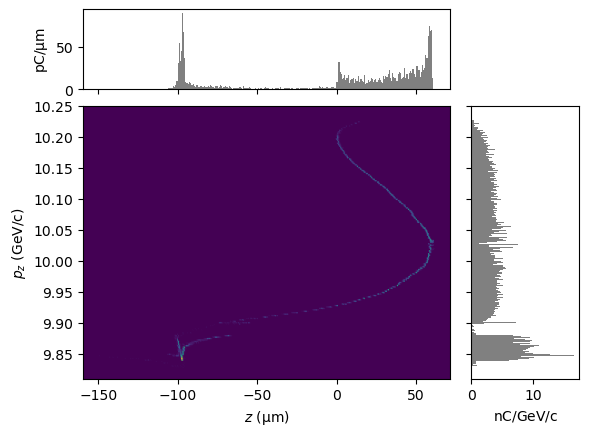

{'PDrive_median_x': -5.4670360972009165e-06,
 'PDrive_median_y': -8.088458266573749e-07,
 'PDrive_median_xp': -3.742715014453033e-05,
 'PDrive_median_yp': 5.179693332209737e-07,
 'PDrive_sigmaSI90_x': 2.276388573677207e-05,
 'PDrive_sigmaSI90_y': 1.8970934895787965e-05,
 'PDrive_sigmaSI90_z': 1.8124468604674566e-05,
 'PDrive_sigmaSI90_xp': 9.485544659454585e-05,
 'PDrive_sigmaSI90_yp': 2.4106993658565398e-05,
 'PDrive_emitSI90_x': 4.218126942204673e-05,
 'PDrive_emitSI90_y': 5.676023806701729e-06,
 'PDrive_norm_emit_x': 5.104811038319168e-05,
 'PDrive_norm_emit_y': 8.23905460067268e-06,
 'PDrive_zCentroid': 991.3313201595656,
 'PDrive_charge_nC': 1.2120908800000003,
 'PWitness_median_x': -8.473599326943512e-06,
 'PWitness_median_y': 8.326292733812572e-07,
 'PWitness_median_xp': 8.1906519610603e-05,
 'PWitness_median_yp': -5.9351752103442325e-06,
 'PWitness_sigmaSI90_x': 1.8810704998137842e-05,
 'PWitness_sigmaSI90_y': 1.378727721816939e-05,
 'PWitness_sigmaSI90_z': 7.844475381481426e-0

In [7]:
# Implement calculated FF optics (should be very close to YML loaded optics)
activeSettings = importedDefaultSettings | allMagnetConfigs["PENT"]
setLattice(tao, **activeSettings)

trackBeam(tao, 
          trackStart = "MFFF",
          **activeSettings
         )

P = getBeamAtElement(tao, "PENT")
display(plotMod(P, 'z', 'pz', bins=300))
getBeamSpecs(P)

## Automate

In [36]:
quadNameList = ["Q5FF", "Q4FF", "Q3FF", "Q2FF", "Q1FF", "Q0FF"]
quadErrorSigma = 50e-6 


unifiedResults = []

for iteration in np.arange(20):

    #Introduce random offsets
    
    tao.cmd("set global lattice_calc_on = F")
    for quad in quadNameList:
        setXOffset(tao, quad, quadErrorSigma * np.random.normal())
        setYOffset(tao, quad, quadErrorSigma * np.random.normal())
    tao.cmd("set global lattice_calc_on = T")


    results = []

    #Implement the FF optics then track
    for configKey in allMagnetConfigs.keys():
        
        activeSettings = importedDefaultSettings | allMagnetConfigs[configKey]
        
        setLattice(tao, **activeSettings)
        
        trackBeam(tao, 
                  trackStart = "MFFF",
                  **activeSettings
                 )

        P = getBeamAtElement(tao, "PENT")
        beamSpecs = getBeamSpecs(P)
        results.append(beamSpecs)

    relativeResults = {
        "upstreamDriveX"  : results[0]["PDrive_median_x"]  - results[1]["PDrive_median_x"],
        "upstreamDriveXp" : results[0]["PDrive_median_xp"] - results[1]["PDrive_median_xp"],
        "upstreamDriveY"  : results[0]["PDrive_median_y"]  - results[1]["PDrive_median_y"],
        "upstreamDriveYp" : results[0]["PDrive_median_yp"] - results[1]["PDrive_median_yp"],

        "downstreamDriveX"  : results[2]["PDrive_median_x"]  - results[1]["PDrive_median_x"],
        "downstreamDriveXp" : results[2]["PDrive_median_xp"] - results[1]["PDrive_median_xp"],
        "downstreamDriveY"  : results[2]["PDrive_median_y"]  - results[1]["PDrive_median_y"],
        "downstreamDriveYp" : results[2]["PDrive_median_yp"] - results[1]["PDrive_median_yp"],

        "upstreamWitnessX"  : results[0]["PWitness_median_x"]  - results[1]["PDrive_median_x"],
        "upstreamWitnessXp" : results[0]["PWitness_median_xp"] - results[1]["PDrive_median_xp"],
        "upstreamWitnessY"  : results[0]["PWitness_median_y"]  - results[1]["PDrive_median_y"],
        "upstreamWitnessYp" : results[0]["PWitness_median_yp"] - results[1]["PDrive_median_yp"],

        "PENTWitnessX"  : results[1]["PWitness_median_x"]  - results[1]["PDrive_median_x"],
        "PENTWitnessXp" : results[1]["PWitness_median_xp"] - results[1]["PDrive_median_xp"],
        "PENTWitnessY"  : results[1]["PWitness_median_y"]  - results[1]["PDrive_median_y"],
        "PENTWitnessYp" : results[1]["PWitness_median_yp"] - results[1]["PDrive_median_yp"],

        "downstreamWitnessX"  : results[2]["PWitness_median_x"]  - results[1]["PDrive_median_x"],
        "downstreamWitnessXp" : results[2]["PWitness_median_xp"] - results[1]["PDrive_median_xp"],
        "downstreamWitnessY"  : results[2]["PWitness_median_y"]  - results[1]["PDrive_median_y"],
        "downstreamWitnessYp" : results[2]["PWitness_median_yp"] - results[1]["PDrive_median_yp"],
    }

    unifiedResults.append(relativeResults)





        




/Users/nmajik/Documents/SLAC/FACET2-Bmad-PyTao/UTILITY_quickstart.py:445: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(sigmax**2 + 2 * z * rho * sigmax * sigmaxp + z**2 * sigmaxp**2)
/Users/nmajik/Documents/SLAC/FACET2-Bmad-PyTao/UTILITY_quickstart.py:476: RuntimeWarning: invalid value encountered in sqrt
  emit_opt = np.sqrt( sigmax_opt**2 * sigmaxp_opt**2 - (rho_opt * sigmax_opt * sigmaxp_opt)**2 )


In [38]:
for key in relativeResults.keys():
    activeVariableData = [ i[key] for i in unifiedResults]
    meanVal = 1e6 * np.mean(activeVariableData)
    sigmaVal = 1e6 * np.std(activeVariableData)
    print(f"""{key}: {meanVal:.2f} ± {sigmaVal:.2f}""")

upstreamDriveX: -18.17 ± 12.73
upstreamDriveXp: 0.06 ± 1.43
upstreamDriveY: 7.85 ± 31.70
upstreamDriveYp: 1.92 ± 7.11
downstreamDriveX: 19.97 ± 9.20
downstreamDriveXp: -0.26 ± 1.85
downstreamDriveY: -7.44 ± 27.84
downstreamDriveYp: -1.78 ± 5.91
upstreamWitnessX: 43.32 ± 16.01
upstreamWitnessXp: 119.96 ± 2.49
upstreamWitnessY: 10.54 ± 48.22
upstreamWitnessYp: -3.12 ± 12.78
PENTWitnessX: -2.39 ± 3.99
PENTWitnessXp: 119.54 ± 1.15
PENTWitnessY: 4.99 ± 15.15
PENTWitnessYp: -5.50 ± 5.57
downstreamWitnessX: -44.66 ± 6.79
downstreamWitnessXp: 119.01 ± 0.87
downstreamWitnessY: 1.58 ± 13.33
downstreamWitnessYp: -7.59 ± 1.70
